In [2]:
import time
import math
import numpy as np
import rtde.rtde as rtde
import rtde.rtde_config as rtde_config
from roboticstoolbox import models
from spatialmath import SE3
from spatialmath.base import angvec2tr
from roboticstoolbox import DHRobot, RevoluteDH


In [10]:
ROBOT_IP = "192.168.200.10"  # Replace with your UR5's IP address
PORT = 30004                 # Default RTDE port for UR robots

# Load the RTDE configuration (ensure your XML outputs joint angles & TCP pose)
conf = rtde_config.ConfigFile("./RTDE_Python_Client_Library/examples/record_configuration.xml")
output_names, output_types = conf.get_recipe("out")

# Establish RTDE connection to the UR5
con = rtde.RTDE(ROBOT_IP, PORT)
con.connect()
con.send_output_setup(output_names, output_types)
con.send_start()
state = con.receive()
q = state.actual_q  # Retrieve the current joint angles

# Define the robot links using DH parameters

# Link 1
L1 = RevoluteDH(
    d=0.1625,
    a=0,
    alpha=np.pi/2,
    m=3.761,
    r=[0, -0.02561, 0.00193],
    I=np.zeros((3, 3))
)

# Link 2
L2 = RevoluteDH(
    d=0,
    a=-0.425,
    alpha=0,
    m=8.058,
    r=[0.2125, 0, 0.11336],
    I=np.zeros((3, 3))
)

# Link 3
L3 = RevoluteDH(
    d=0,
    a=-0.3922,
    alpha=0,
    m=2.846,
    r=[0.15, 0, 0.0265],
    I=np.zeros((3, 3))
)

# Link 4
L4 = RevoluteDH(
    d=0.1333,
    a=0,
    alpha=np.pi/2,
    m=1.37,
    r=[0, -0.0018, 0.01634],
    I=np.zeros((3, 3))
)

# Link 5
L5 = RevoluteDH(
    d=0.0997,
    a=0,
    alpha=-np.pi/2,
    m=1.3,
    r=[0, 0.0018, 0.01634],
    I=np.zeros((3, 3))
)

# Link 6
I6 = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0.0002]
])
L6 = RevoluteDH(
    d=0.0996,
    a=0,
    alpha=0,
    m=0.365,
    r=[0, 0, -0.001159],
    I=I6
)

# Create the UR5e robot model
UR5e = DHRobot([L1, L2, L3, L4, L5, L6], name='UR5e')

tool_offset = SE3(0, 0, 0.2)
UR5e.tool = tool_offset  # Incorporate this offset into forward kinematics

print("Joint angles:", q)

Joint angles: [0.7267626523971558, -1.940242429772848, -2.0475924015045166, -2.276363035241598, -0.8830555121051233, 2.365025043487549]


In [11]:
print(UR5e)

DHRobot: UR5e, 6 joints (RRRRRR), dynamics, standard DH parameters
┌─────┬────────┬─────────┬────────┐
│ θⱼ  │   dⱼ   │   aⱼ    │   ⍺ⱼ   │
├─────┼────────┼─────────┼────────┤
│  q1 │ 0.1625 │       0 │  90.0° │
│  q2 │      0 │  -0.425 │   0.0° │
│  q3 │      0 │ -0.3922 │   0.0° │
│  q4 │ 0.1333 │       0 │  90.0° │
│  q5 │ 0.0997 │       0 │ -90.0° │
│  q6 │ 0.0996 │       0 │   0.0° │
└─────┴────────┴─────────┴────────┘

┌──────┬─────────────────────────────────────┐
│ tool │ t = 0, 0, 0.2; rpy/xyz = 0°, 0°, 0° │
└──────┴─────────────────────────────────────┘



In [12]:
# Compute forward kinematics for the current joint angles
T = np.array(UR5e.fkine(q).A)
print("End-effector pose (with tool offset):")
print(T)
# print(T.A)

# # # Define a transformation matrix from the robot frame to the world frame
A = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0.0575],
    [1, 0, 0, 0.4],
    [0, 0, 0, 1]
])

# # Compute the final transformation (world frame pose)
result = T @ A
print("End-effector pose in world frame:")

End-effector pose (with tool offset):
[[ 0.01794496  0.03752222  0.99913466  0.6982864 ]
 [-0.72156742 -0.69124941  0.03891939  0.18799607]
 [ 0.69211158 -0.72164142  0.01467037  0.16986   ]
 [ 0.          0.          0.          1.        ]]
End-effector pose in world frame:


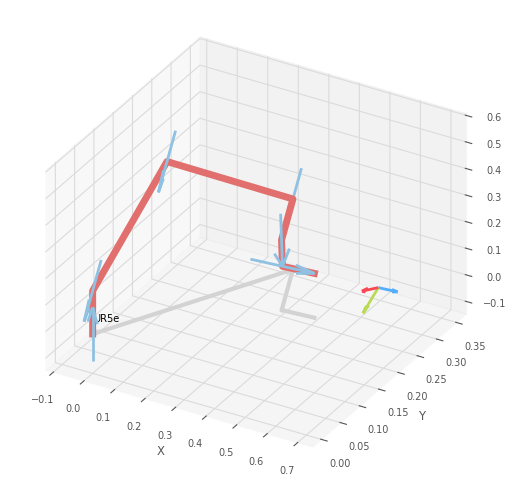

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'UR5e')

<Figure size 640x480 with 0 Axes>

In [8]:
UR5e.plot(q)  # Visualize the UR5 in the given joint configuration